<a href="https://colab.research.google.com/github/Nisanth06/nisanth06/blob/main/alzheimer_multi_class_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
 IMG_SIZE=224
 BATCH_SIZE=32

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [4]:
train_generator = train_datagen.flow_from_directory( '/content/drive/MyDrive/multiclass/multiclass',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 3208 images belonging to 4 classes.


In [6]:
val_generator = train_datagen.flow_from_directory( '/content/drive/MyDrive/multiclass/multiclass',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 802 images belonging to 4 classes.


In [7]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("class indices:",class_indices)
print("Class names:",class_names)

class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented2': 2, 'VeryMildDemented': 3}
Class names: ['MildDemented', 'ModerateDemented', 'NonDemented2', 'VeryMildDemented']


In [8]:
model=keras.Sequential([
  layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE, IMG_SIZE,3)) ,
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(128,(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(128,activation='relu'),
  layers.Dense(4,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=2,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 1656s 15s/step - accuracy: 0.5557 - loss: 1.3066 - val_accuracy: 0.5150 - val_loss: 2.0296
Epoch 2/2
101/101 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.8929 - loss: 0.2789 - val_accuracy: 0.5860 - val_loss: 2.5021


In [11]:
model.save('/content/drive/MyDrive/ss/archive (1)/Brain_Tumor_Dataset/blue1.h5')

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/ss/archive (1)/Brain_Tumor_Dataset/blue1.h5')
print("Model Loaded")


Model Loaded


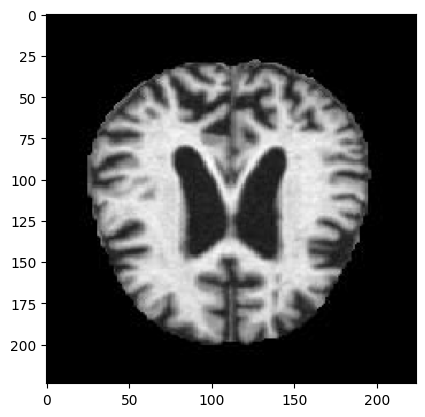

In [13]:
#load and view the test image
test_image_path='/content/drive/MyDrive/multiclass/multiclass/ModerateDemented/31 (2).jpg'
img = image.load_img(test_image_path, target_size=(224, 224))
plt.imshow(img)
plt.axis()
plt.show()

In [14]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255

In [15]:
prediction = model.predict(img_array)
ind = np.argmax(prediction[0])
print (class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
ModerateDemented


In [16]:
if (class_names[0]):
     print("Mild Demented")
elif (class_names[1]):
     print("Moderate Demented")
elif (class_names[2]):
     print("Non Demented")
else:
     print("Very mild Detected")

Mild Demented
